In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import math
import scipy
import random

from statsmodels.distributions.empirical_distribution import ECDF

# Statistics

Any time you take a sample and reduce it to a single number, that number is a statistic. The statistics we have seen so far include mean, variance, median, and interquartile range.

## Raw moment

In [2]:
x = np.linspace(0,10,11)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [3]:
def RawMoment(xs, k):
    return sum(x**k for x in xs)/len(xs)

first row moment is mean

In [4]:
RawMoment(x,1)

5.0

## Cental moment

In [5]:
def CentralMoment(xs, k):
    mean = RawMoment(xs,1)
    
    return sum((x - mean)**k for x in xs) / len(xs)

Second central moment is variance

In [6]:
CentralMoment(x, 2)

10.0

## Standardized Moment

normalized central moment, so it has no units.

In [7]:
def StandardizeMoment(xs,k):
    var = CentralMoment(xs, 2)
    std = math.sqrt(var)
    
    return CentralMoment(xs, k)/std**k

In [8]:
StandardizeMoment(x, 2)

0.9999999999999998

## Skewness


### as a third standardized moment

In [9]:
def Skewness(xs):
    return round(StandardizeMoment(xs, 3),3)

### Pearson’s median skewness coefficient 

In [10]:
def PearsonMedianSkewness(xs):
    median = np.median(xs)
    mean = np.mean(xs)
    
    std = np.std(xs)
    
    gp = 3 * (mean - median)/std
    
    return round(gp,3)

In [11]:
sample = [random.gauss(0,1) for i in range(0,11)]

In [12]:
PearsonMedianSkewness(sample)

-0.891

Sample skewness is less robust; that is, it is more susceptible to outliers. As a result it is less reliable when applied to skewed distributions, exactly when it would be most relevant.

Pearson’s median skewness is based on a computed mean and variance, so it is also susceptible to outliers, but since it does not depend on a third moment, it is somewhat more robust.

### Example with birth weight

In [13]:
preg = pd.read_csv('code/preg.csv')
live = preg[preg.outcome==1]

<AxesSubplot:label='d263d050-8979-440c-b31a-b958a2493b78', xlabel='totalwgt_lb', ylabel='Count'>

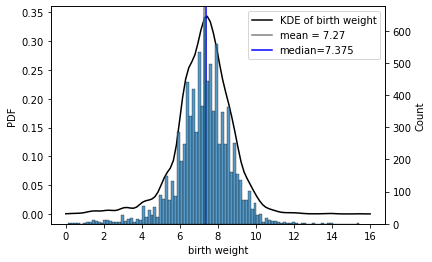

In [14]:
xs = np.linspace(0,16,100)
kde_plot = scipy.stats.gaussian_kde(live.totalwgt_lb.dropna()).evaluate(xs)

sns.lineplot(x=xs, y=kde_plot,color='black').set(xlabel='birth weight',ylabel='PDF')
plt.axvline(live.totalwgt_lb.mean(), 0, live.totalwgt_lb.mode(),color='gray')
plt.axvline(live.totalwgt_lb.median(), 0, live.totalwgt_lb.mode(),color='blue')
plt.legend(['KDE of birth weight',f'mean = {round(live.totalwgt_lb.mean(),2)}',f'median={live.totalwgt_lb.median()}'])

ax2 = plt.twinx()
sns.histplot(live.totalwgt_lb,ax=ax2)


In [15]:
f"Distribution is skewed left, sample skewness is {Skewness(live.totalwgt_lb.dropna())}, Pearson's skewness is {PearsonMedianSkewness(live.totalwgt_lb.dropna())}"

"Distribution is skewed left, sample skewness is -0.59, Pearson's skewness is -0.233"

### Example with adult weight

In [16]:
brfss = pd.read_csv('code/brfss.csv')

<AxesSubplot:label='7f81e77c-052c-4286-a148-b5ba130e8f25', xlabel='wtkg2', ylabel='Count'>

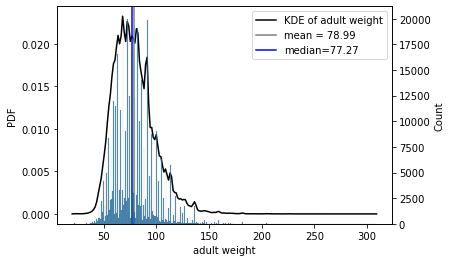

In [17]:
xs = np.linspace(min(brfss.wtkg2),max(brfss.wtkg2),200)
kde_plot = scipy.stats.gaussian_kde(brfss.wtkg2.dropna()).evaluate(xs)

mean = brfss.wtkg2.dropna().mean()
median =brfss.wtkg2.dropna().median()
mode = brfss.wtkg2.mode()

sns.lineplot(x=xs, y=kde_plot,color='black').set(xlabel='adult weight',ylabel='PDF')
plt.axvline(mean, 0, mode,color='gray')
plt.axvline(median, 0, mode,color='blue')

plt.legend(['KDE of adult weight',f'mean = {round(mean,2)}',f'median={median}'])

ax2 = plt.twinx()
sns.histplot(brfss.wtkg2,ax=ax2)

In [18]:
f"Distribution is skewed right, sample skewness is {Skewness(brfss.wtkg2.dropna())}, Pearson's skewness is {PearsonMedianSkewness(brfss.wtkg2.dropna())}"

"Distribution is skewed right, sample skewness is 1.055, Pearson's skewness is 0.264"

## Exercise for chapter 6

In [19]:
hinc = pd.read_csv('code/hinc.csv')

In [20]:
# hinc[hinc.income==np.inf]

In [21]:
hinc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   income  42 non-null     float64
 1   freq    42 non-null     int64  
 2   cumsum  42 non-null     int64  
 3   ps      42 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.4 KB


In [22]:
# copypast from hinc2.py
def InterpolateSample(df, log_upper=6.0):
     # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.log_lower[0] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for index, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

In [23]:
income_log = InterpolateSample(hinc,log_upper=6)
income = np.power(10, income_log)

<ipython-input-22-428e37da6e73>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.log_lower[0] = 3.0
<ipython-input-22-428e37da6e73>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.log_upper[41] = log_upper


In [24]:
max(income)

1000000.0

[(0.0, 500000.0)]

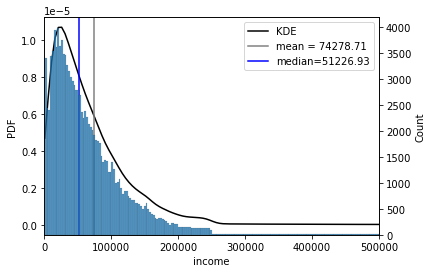

In [25]:
xs = np.linspace(min(income),max(income),200)
kde_plot = scipy.stats.gaussian_kde(income).evaluate(xs)

mean = income.mean()
median = np.median(income)
mode = np.max(income)

sns.lineplot(x=xs, y=kde_plot,color='black').set(xlabel='income',ylabel='PDF')
plt.axvline(mean, 0, mode,color='gray')
plt.axvline(median, 0, mode,color='blue')

plt.legend(['KDE',f'mean = {round(mean,2)}',f'median={round(median,2)}'])

ax2 = plt.twinx()
sns.histplot(income,ax=ax2).set(xlim=[0,500000])

In [26]:
f"Distribution is skewed right sample skewness is {Skewness(income)}, Pearson's skewness is {PearsonMedianSkewness(income)}"

"Distribution is skewed right sample skewness is 4.95, Pearson's skewness is 0.736"

In [27]:
cdf_income = ECDF(income)

[Text(0.5, 0, 'income'), Text(0, 0.5, 'CDF')]

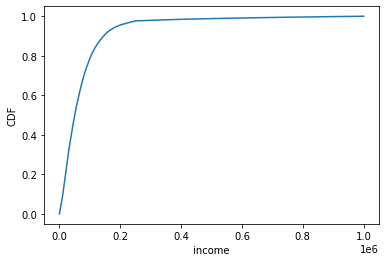

In [28]:
xs = np.linspace(min(income),max(income),200)
sns.lineplot(x=xs,y=cdf_income(xs)).set(xlabel='income',ylabel='CDF')

In [29]:
f'{round(cdf_income(income.mean())*100)}% of housholds have income below the mean'

'66% of housholds have income below the mean'

# Relationships between variables

In [30]:
def random_subset(df,nrows,replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    
    return df.loc[indices]

In [31]:
brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414509 entries, 0 to 414508
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   age      410856 non-null  float64
 1   sex      414509 non-null  int64  
 2   wtyrago  390399 non-null  float64
 3   finalwt  414509 non-null  float64
 4   wtkg2    398484 non-null  float64
 5   htm3     409129 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 19.0 MB


In [32]:
brfss_sample = random_subset(brfss, 5000)

In [33]:
brfss_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 15280 to 30635
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      4963 non-null   float64
 1   sex      5000 non-null   int64  
 2   wtyrago  4733 non-null   float64
 3   finalwt  5000 non-null   float64
 4   wtkg2    4803 non-null   float64
 5   htm3     4936 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 273.4 KB


## Scatter plots

[Text(0.5, 0, 'height, cm'), Text(0, 0.5, 'weight, kg')]

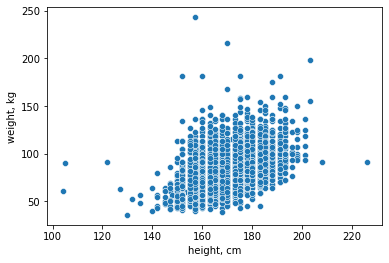

In [34]:
sns.scatterplot(x=brfss_sample.htm3, y=brfss_sample.wtkg2).set(xlabel='height, cm',ylabel='weight, kg')

#### avoiding columns
arise because of rounding

In [35]:
def Jitter(values,jitter=0.5):
    uniform_shifts = np.random.uniform(-jitter, +jitter, len(values))
    
    return uniform_shifts + values

[Text(0.5, 0, 'height, cm'),
 Text(0, 0.5, 'weight, kg'),
 Text(0.5, 1.0, 'Jittered scatter plots of weight versus height.')]

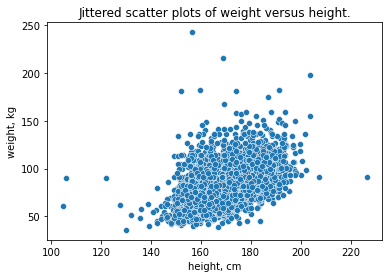

In [36]:
ax = sns.scatterplot(x=Jitter(brfss_sample.htm3,1.3), y=Jitter(brfss_sample.wtkg2,0.5))
ax.set(xlabel='height, cm',ylabel='weight, kg', title='Jittered scatter plots of weight versus height.')

#### avoiding saturation

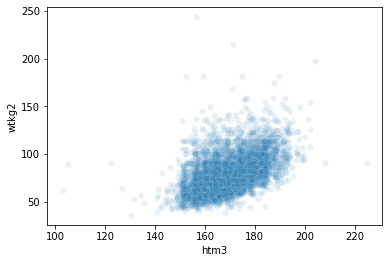

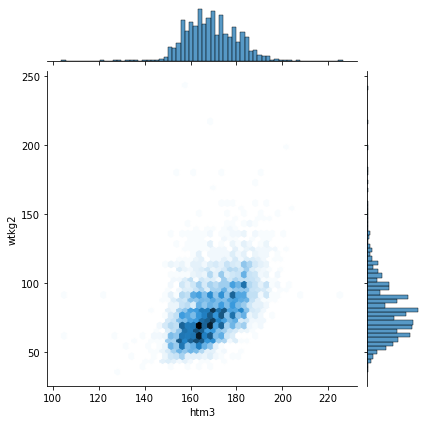

In [37]:
sns.scatterplot(x=Jitter(brfss_sample.htm3, 1.3), y=Jitter(brfss_sample.wtkg2,0.5),alpha=0.1)
sns.jointplot(x=Jitter(brfss_sample.htm3, 1.3), y=Jitter(brfss_sample.wtkg2,0.5),kind='hex')

## Characterizing relationships

One option is to bin one variable and plot percentiles of the other.

In [38]:
brfss = brfss.dropna(subset=['htm3','wtkg2'])

In [39]:
bins=np.arange(135,210,5)
indices = np.digitize(brfss.htm3, bins)
groups = brfss.groupby(indices)

In [40]:
for i, group in groups:
    print(i, len(group))
#     print(group)    

0 305
1 228
2 477
3 2162
4 18759
5 45761
6 70610
7 72138
8 61725
9 49938
10 43555
11 20077
12 7784
13 1777
14 405
15 131


In [41]:
heights = []
cdfs = []
for i, group in groups:
    heights.append(group.htm3.mean())
    cdfs.append(ECDF(group.wtkg2))

In [42]:
w_range = np.linspace(min(brfss_sample.wtkg2),max(brfss_sample.wtkg2),1001)

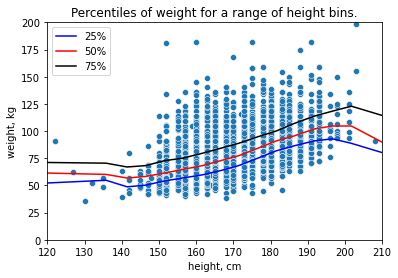

In [43]:
ax=sns.scatterplot(x=brfss_sample.htm3, y=brfss_sample.wtkg2)
ax.set(xlabel='height, cm',ylabel='weight, kg',xlim=[120,210],ylim=[0,200],title='Percentiles of weight for a range of height bins.')

colors = {25:'blue',50:'red',75:'black'}

for percent in [25,50,75]:
    weights = []
    for cdf in cdfs:
        ind = np.where(cdf(w_range) >= percent/100)[0]
        
        weights.append(w_range[ind[0]])
        
    sns.lineplot(x=heights, y=weights,color=colors[percent])
    
plt.legend([f"{per}%" for per in [25,50,75]])



## Covariance

a measure of the tendency of two variables to vary together.

In [44]:
def covariance(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx = np.mean(xs)
    meany = np.mean(ys)
    
    cov = np.dot(xs - meanx, ys - meany)/len(xs)
    
    return round(cov,2)

In [45]:
f"The covariance of height and weight is {covariance(brfss.htm3, brfss.wtkg2)} kg*cm"

'The covariance of height and weight is 103.33 kg*cm'

## Pearson’s correlation 

 only measures linear relationships.

In [46]:
def correlation(xs,ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx = np.mean(xs)
    meany = np.mean(ys)
    
    stdx = np.std(xs)
    stdy = np.std(ys)
    
    corr = covariance(xs,ys)/(stdx * stdy)
    return round(corr,2)

In [47]:
f"The Pearsons's correlation of height and weight is {correlation(brfss.htm3, brfss.wtkg2)}"

"The Pearsons's correlation of height and weight is 0.51"

## Spearman’s rank correlation 

is an alternative to Pearson's correlation that mitigates the effect of outliers and skewed distributions.

In [48]:
def Spearman_correlation(xs,ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    
    return correlation(xranks, yranks)

In [49]:
Spearman_correlation(brfss.htm3, brfss.wtkg2)

0.54

The Spearman rank correlation for the BRFSS data is 0.54, a little higher than the Pearson correlation, 0.51. There are several possible reasons for the difference, including:

If the relationship is nonlinear, Pearson’s correlation tends to underestimate the strength of the relationship, and
Pearson’s correlation can be affected (in either direction) if one of the distributions is skewed or contains outliers. Spearman’s rank correlation is more robust.

In the BRFSS example, we know that the distribution of weights is roughly lognormal; under a log transform it approximates a normal distribution, so it has no skew. So another way to eliminate the effect of skewness is to compute Pearson’s correlation with log-weight and height:

In [50]:
correlation(brfss.htm3, np.log(brfss.wtkg2))

0.53

The result is 0.53, close to the rank correlation, 0.54. So that suggests that skewness in the distribution of weight explains most of the difference between Pearson’s and Spearman’s correlation.

## Exercise to chapter 7

[Text(0, 0.5, 'birth weight'), Text(0.5, 0, 'mother age')]

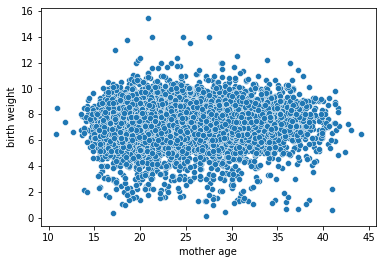

In [51]:
sns.scatterplot(y=preg.totalwgt_lb, x=preg.agepreg).set(ylabel='birth weight',xlabel='mother age')

In [52]:
preg_na = preg[preg.outcome==1].dropna(subset=['totalwgt_lb','agepreg'])
bw = preg_na.totalwgt_lb
mage = preg_na.agepreg

In [53]:
bins = np.arange(10,48,3)
indices = np.digitize(mage, bins)
groups = preg_na.groupby(indices)

In [54]:
for i,group in groups:
    print(i, len(group))

1 4
2 180
3 1169
4 1824
5 1695
6 1505
7 1223
8 830
9 402
10 170
11 34
12 2


In [55]:
ages = []
cdfs = []

for i,group in groups:
    ages.append(group.agepreg.mean())
    cdfs.append(ECDF(group.totalwgt_lb))

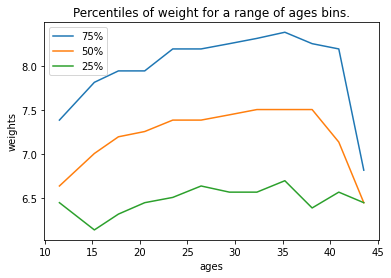

In [56]:
w_range = np.linspace(0,20,2000)
p_range = [75, 50, 25]

for percent in p_range:
    weights = []
    
    for cdf in cdfs:
        inds = np.where(cdf(w_range)>= percent / 100)[0]
        weights.append( w_range[inds[0]] )
    
    ax=sns.lineplot(x=ages, y=weights)

ax.set(xlabel='ages',ylabel='weights',title='Percentiles of weight for a range of ages bins.')
plt.legend([f"{per}%" for per in p_range])

In [57]:
f"Pearson's correlation is {correlation(bw, mage)}, Spearman's rank correlation is {Spearman_correlation(bw, mage)}"

"Pearson's correlation is 0.07, Spearman's rank correlation is 0.09"

# Estimation

In [58]:
xs = [-0.441, 1.774, -0.101, -1.138, 2.975, -2.138]

In [59]:
np.mean(xs)

0.15516666666666667

In [60]:
xs_2 = [-0.441, 1.774, -0.101, -1.138, 2.975, -213.8]

In [61]:
np.mean(xs_2), np.median(xs_2)

(-35.121833333333335, -0.271)

In [62]:
def RMSE(estimates, actual):
    error2 = [(estimate - actual)**2 for estimate in estimates]
    mse = np.mean(error2)
    rmse = math.sqrt(mse)
    
    return round(rmse,2)

In [63]:
def EstimateMean(n=7, m=1000):
    # size of distrinution is n
    # estimation was done m times
    mu = 0
    sigma =1
    
    means = []
    medians = []
    
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
       
        means.append(np.mean(xs))
        medians.append(np.median(xs))
        
    print('RMSE mean', round(RMSE(means, mu),3))
    print('RMSE median', round(RMSE(medians,mu),3))

In [64]:
EstimateMean()

RMSE mean 0.37
RMSE median 0.46


In [65]:
def MeanError(estimates, actual):
    error = [est-actual for est in estimates]
    
    return round(np.mean(error),3)

In [66]:
def EstimateVariance(n=7, m=1000):
    mu = 0
    sigma = 1
    
    est1 = []
    est2 = []
    
    for _ in range(m):
        xs = [random.gauss(mu,sigma) for i in range(n)]
        
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        
        est1.append(biased)
        est2.append(unbiased)
        
    print('mean error biased', MeanError(est1, sigma**2))
    print('mean error unbiased', MeanError(est2, sigma**2))

In [67]:
EstimateVariance()

mean error biased -0.138
mean error unbiased 0.006


## Sampling distributions

sampling error - variation in the estimate caused by random selection, error due to measuring only part of the population. 

**sampling distribution** is used to quantify sampling error: we simulate the sampling process with hypothetical values of µ and σ, and see how much x varies. The sampling distribution gives you a sense of how reliable an estimate is by telling you how much it would vary if you ran the experiment again. The sampling distribution does not account for other sources of error, notably sampling bias and measurement error.

**Confidence interval** and **standart error** are used to characterised x variance.



In [68]:
def SimulateSample(mu=90,sigma=7.5, n=9, m=1000):
    # mu and sigma are the hypothetical values of the parameters. 
    # n is the sample size, 
    # m is the number of times we run the simulation.
    
    means = []
    
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        means.append( np.mean(xs) )
        
    xarr = np.linspace(mu-2*sigma, mu+2*sigma,200)
    
    mean_cdf =ECDF(means)
    percentile_5 = xarr[np.where(mean_cdf(xarr)>=0.05)[0][0]]
    percentile_95 = xarr[np.where(mean_cdf(xarr)>=0.95)[0][0]]
    
       
    ax = sns.lineplot(x=xarr, y=mean_cdf(xarr))
    ax.set(title='Sampling distribution',xlabel='sample mean',ylabel='cdf')
    
    plt.axvline(percentile_5, 0, 1,color='gray')
    plt.axvline(percentile_95, 0, 1,color='gray')
    
    stderr = RMSE(means, mu)                
    
    print(f"mean = {mu} with 90% confidence interval [{round(percentile_5)},{round(percentile_95)}]\nstandart error of mean is {stderr}")

mean = 90 with 90% confidence interval [86,94]
standart error of mean is 2.52


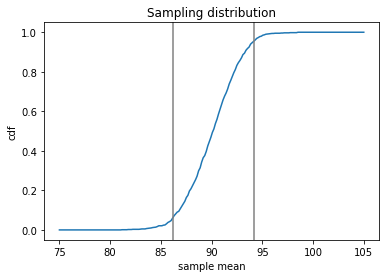

In [69]:
SimulateSample()

### Sampling bias
**Sampling bias**  are due to not really random process of sample selection.

For example, telephone sampling: 
the sample is limited to people whose telephone numbers are listed, so it eliminates people without phones (who might be poorer than average) and people with unlisted numbers (who might be richer). Also, if you call home telephones during the day, you are less likely to sample people with jobs.

### Measurement error

rounding up or down, not honest answers of respondets ...

## Estimators for exponential distribution

In [70]:
def EstimateExp(n=7, m=1000):
    lam = 2
    
    means = []
    medians = []
    
    for _ in range(m):
        xs = np.random.exponential(1/lam, n)
        L = 1/np.mean(xs)
        Lmedian = math.log(2) / np.median(xs)
        
        means.append(L)
        medians.append(Lmedian)
        
    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))

In [71]:
EstimateExp(m=1000)

rmse L 1.06
rmse Lm 1.57
mean error L 0.345
mean error Lm 0.434


In [72]:
EstimateExp(m=10000)

rmse L 1.08
rmse Lm 1.74
mean error L 0.327
mean error Lm 0.453


In [73]:
EstimateExp(m=100000)

rmse L 1.09
rmse Lm 1.79
mean error L 0.335
mean error Lm 0.455


## Exercises to chapter 8

### Exercise 1  

In [74]:
def EstimateMeanAndVar(n=10, m=1000):
    mu = 0
    sigma = 1
    
    means = []
    medians = []
    
    var_biased = []
    var_unbiased = []
    
    for _ in range(m):
        xs = np.random.normal(mu, sigma, n)
        
        means.append(np.mean(xs))
        medians.append(np.median(xs))
        
        var_biased.append(np.var(xs))
        var_unbiased.append(np.var(xs, ddof=1))
        
    print(f"mean estimation: mean error = {MeanError(means, mu)}, rmse = {RMSE(means, mu)}")
    print(f"median estimation: mean error = {MeanError(medians, mu)}, rmse = {RMSE(medians, mu)}")
    print('  => Median is unbiased estimation of mu.')
    print()
    print(f"biased variance etimation: mean error = {MeanError(var_biased, sigma**2)}, rmse = {RMSE(var_biased, sigma**2)}")
    print(f"unbiased variance etimation: mean error = {MeanError(var_unbiased, sigma**2)}, rmse = {RMSE(var_unbiased, sigma**2)}")
    print('  => Unbiased variance is unbiased estimation of sigma.')

In [75]:
EstimateMeanAndVar()

mean estimation: mean error = 0.004, rmse = 0.31
median estimation: mean error = 0.007, rmse = 0.36
  => Median is unbiased estimation of mu.

biased variance etimation: mean error = -0.106, rmse = 0.44
unbiased variance etimation: mean error = -0.007, rmse = 0.48
  => Unbiased variance is unbiased estimation of sigma.


### Exercise 2

[Text(0, 0.5, 'standart error'), Text(0.5, 0, 'sample size')]

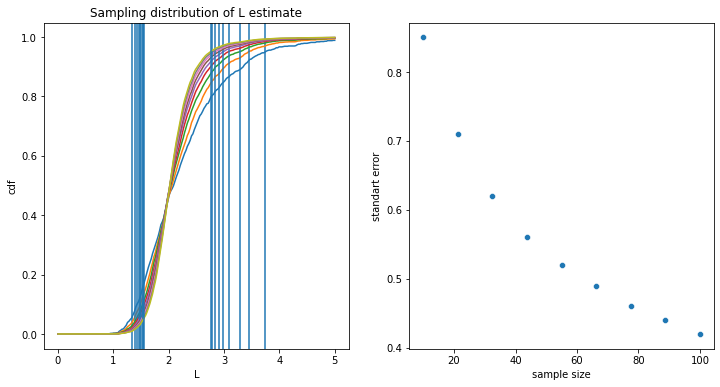

In [76]:
lam = 2
L = []

std_errors = []

fig, ax = plt.subplots(figsize=[12,6],nrows=1, ncols=2)
for n in range(10,100,10):
    for _ in range(1000):
        xs = np.random.exponential(1/lam, n)
        L.append( 1/np.mean(xs) )

    cdf_L = ECDF(L)

    x_arr = np.linspace(0,5,200)

    sns.lineplot(x=x_arr, y=cdf_L(x_arr),ax=ax[0])
    

    ci_l = x_arr[np.where(cdf_L(x_arr)>=0.05)[0][0]]
    ci_u = x_arr[np.where(cdf_L(x_arr)>=0.95)[0][0]]

    ax[0].axvline(ci_l, 0,1)
    ax[0].axvline(ci_u, 0, 1)

    std_error = RMSE(L, lam)
    std_errors.append(std_error)
    
ax[0].set(title='Sampling distribution of L estimate', xlabel='L', ylabel='cdf')

# print(f'standart error is {std_error}')
ax[1] = sns.scatterplot(x=np.linspace(10,100,9), y=std_errors)
ax[1].set(ylabel='standart error', xlabel='sample size')

### Exercise 3

In [77]:
def game_sim(goals_per_game=10):
    goals = 0
    total_time = 0
    
    while total_time < 1: 
        x = np.random.exponential(1/goals_per_game)
        total_time += x
        goals += 1
    
    return goals

In [78]:
game_sim()

10

In [79]:
def repeat_game(goals_per_game=10):
    goals = []
    
    for _ in range(0,1000):
        goals.append(game_sim(goals_per_game))
        
    print(f"mean error of goals estimation is {MeanError(goals, goals_per_game)}")
    print(f"standart error (RMSE) of goals estimation is {RMSE(goals, goals_per_game)}")
    
    cdf_goals = ECDF(goals)
    x_arr = np.linspace(0, 3*goals_per_game,1000)
    
    ax = sns.lineplot(x=x_arr, y=cdf_goals(x_arr))
    ax.set(ylabel='cdf',xlabel='estimation of goals per game')
    
    ci_l = x_arr[np.where(cdf_goals(x_arr) >= 0.05)[0][0]]
    ci_u = x_arr[np.where(cdf_goals(x_arr) >= 0.95)[0][0]]
    
    ax.axvline(ci_l,0,1,color='black')
    ax.axvline(ci_u,0,1,color='black')
    
    print(f'90% confidence interval is [{round(ci_l)},{round(ci_u)}]')
    plt.legend(['cdf','confidence interval'])

mean error of goals estimation is 1.183
standart error (RMSE) of goals estimation is 3.43
90% confidence interval is [6,17]


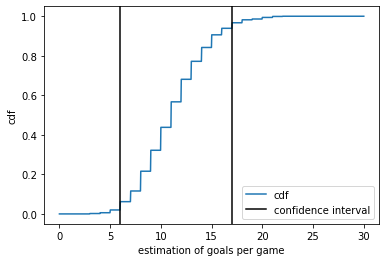

In [80]:
repeat_game()

# Hypothesis testing

is effect statistically significant?

In [81]:
heads = 140
tails = 110

test_stat = abs(heads-tails)
test_stat

30

In [82]:
def coin_toss(heads, tails):
    # simualte coin tosses
    n = heads + tails
    sample = [random.choice('HT') for _ in range(n)]

#     sns.histplot(sample)
    vals, counts = np.unique(sample,return_counts=True)
    head_sample = counts[0]
    tail_sample = counts[1]
    
    return abs(head_sample - tail_sample)

In [83]:
coin_toss(heads, tails)

2

p value is 0.038


<AxesSubplot:ylabel='Count'>

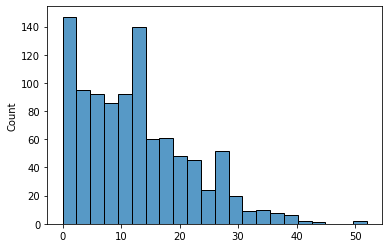

In [84]:
statistic = []
for _ in range(1000):
    statistic.append( coin_toss(heads, tails) )

cdf_dist = ECDF(statistic)

p_value = 1 - cdf_dist(test_stat)
print(f"p value is {round(p_value,3)}")

sns.histplot(statistic)

## Testing a difference in pregnancy length for first and others babies's 

### two-sided

In [85]:
firsts = preg[(preg.outcome==1) & (preg.birthord == 1)]
others = preg[(preg.outcome==1) & (preg.birthord != 1)]

In [86]:
firsts = firsts[firsts.prglngth.isna()==False]
others = others[others.prglngth.isna()==False]

In [87]:
statistic = abs(firsts.prglngth.mean() - others.prglngth.mean())

p value is 0.157


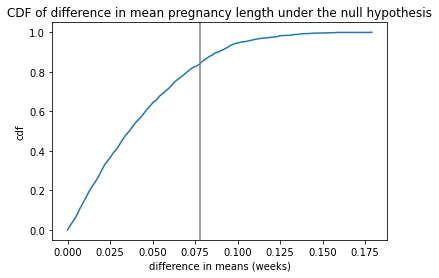

In [88]:
pool = np.hstack((firsts.prglngth.values, others.prglngth.values))

firsts_len = len(firsts.prglngth)
others_len = len(others.prglngth)

statistic_distribution = []
for __ in range(1000):
    sample_1 = [np.random.choice(pool,replace=True) for _ in range(firsts_len)]
    sample_2 = [np.random.choice(pool,replace=True) for _ in range(others_len)]
    
    statistic_distribution.append(abs(np.mean(sample_1) - np.mean(sample_2)))

stat_dist_cdf = ECDF(statistic_distribution)
p_value = 1 - stat_dist_cdf(statistic)

print(f'p value is {round(p_value,3)}')

x_arr = np.linspace(0,max(statistic_distribution),100)
ax = sns.lineplot(x=x_arr, y=stat_dist_cdf(x_arr))
ax.set(title='CDF of difference in mean pregnancy length under the null hypothesis',
      xlabel='difference in means (weeks)', ylabel='cdf')
plt.axvline(statistic, 0 ,1, color='gray')

=> So this effect is not statistically significant.

### one-sided

In [89]:
statistic = firsts.prglngth.mean() - others.prglngth.mean()
statistic

0.07803726677754952

p value is 0.081


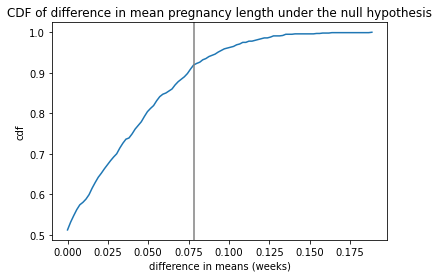

In [90]:
pool = np.hstack((firsts.prglngth.values, others.prglngth.values))

firsts_len = len(firsts.prglngth)
others_len = len(others.prglngth)

statistic_distribution = []
for __ in range(1000):
    sample_1 = [np.random.choice(pool,replace=True) for _ in range(firsts_len)]
    sample_2 = [np.random.choice(pool,replace=True) for _ in range(others_len)]
    
    statistic_distribution.append(np.mean(sample_1) - np.mean(sample_2))

stat_dist_cdf = ECDF(statistic_distribution)
p_value = 1 - stat_dist_cdf(statistic)

print(f'p value is {round(p_value,3)}')

x_arr = np.linspace(0,max(statistic_distribution),100)
ax = sns.lineplot(x=x_arr, y=stat_dist_cdf(x_arr))
ax.set(title='CDF of difference in mean pregnancy length under the null hypothesis',
      xlabel='difference in means (weeks)', ylabel='cdf')
plt.axvline(statistic, 0 ,1, color='gray')

## Testing a difference in birth weight for first and others babies's 

In [91]:
firsts = firsts[firsts.totalwgt_lb.isna()==False]
others = others[others.totalwgt_lb.isna()==False]

In [92]:
statistic = abs(firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean())
statistic

0.12476118453549034

p value is 0.0


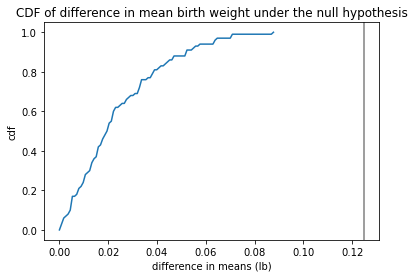

In [93]:
pool = np.hstack( (firsts.totalwgt_lb.values,others.totalwgt_lb.values) )

statistic_dist = []

for _ in range(100):
    sample_1 = [np.random.choice(pool, replace=True) for __ in range( len(firsts.totalwgt_lb) )]
    sample_2 = [np.random.choice(pool, replace=True) for __ in range( len(others.totalwgt_lb) )]
    
    statistic_dist.append( abs(np.mean(sample_1) - np.mean(sample_2)) )

statistic_dist_cdf = ECDF(statistic_dist)
p_value = 1 - statistic_dist_cdf(statistic)
print(f"p value is {p_value}")

x_arr = np.linspace(0,max(statistic_dist),100)
ax = sns.lineplot(x=x_arr, y=statistic_dist_cdf(x_arr))
ax.set(title='CDF of difference in mean birth weight under the null hypothesis',
      xlabel='difference in means (lb)', ylabel='cdf')

plt.axvline(statistic,0,1,color='gray')

## Test a correlation between mother’s age and birth weight

In [94]:
preg_tmp = preg.dropna(subset=['agepreg','totalwgt_lb'])
live = preg_tmp[(preg_tmp.outcome==1)]

In [95]:
statistic = correlation(live.agepreg,live.totalwgt_lb)

p value is 0.0
p value obtained using cdf is 0.0


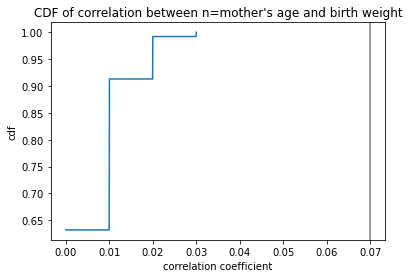

In [96]:
iters = 1000
counter = 0

stat_dist = []
for _ in range(iters):
    sample_age = [np.random.choice(live.agepreg, replace=True) for __ in range(len(live.agepreg))]
    sample_weight = [np.random.choice(live.totalwgt_lb, replace=True) for __ in range(len(live.totalwgt_lb))]
    
    sample_stat = correlation(sample_age, sample_weight)
    
    if sample_stat >= statistic:
        counter += 1
    
    stat_dist.append(sample_stat)
    
cdf_stat = ECDF(stat_dist)

p_value = counter / iters
print(f"p value is {p_value}")
print(f"p value obtained using cdf is {round(1-cdf_stat(statistic),3)}")

x_arr = np.linspace(0,max(stat_dist),500)
ax = sns.lineplot(x=x_arr, y=cdf_stat(x_arr))
ax.set(title="CDF of correlation between n=mother's age and birth weight",
      xlabel='correlation coefficient', ylabel='cdf')

plt.axvline(statistic,0,1,color='gray')

=>  So although the observed correlation is small, it is statistically significant.

This example is a reminder that “statistically significant” does not always mean that an effect is important, or significant in practice. It only means that it is unlikely to have occurred by chance.

##  Testing proportions (example with die)

In [97]:
die_value = [1,2,3,4,5,6]
observed = [8, 9, 19, 5, 8, 11] # observed frequency

In [98]:
total_rolls = sum(observed)

expected  = np.ones(6) * total_rolls / 6
test_statistic = sum( abs(observed - expected) )

counter = 0

for _ in range(10000):
    sample = np.random.choice([1,2,3,4,5,6], size=total_rolls, replace=True)
    vals, counts = np.unique(sample, return_counts=True)
    
    expected = np.ones(len(counts)) * total_rolls / len(counts)
    
    sample_stat = sum(abs(counts - expected))
    if  sample_stat >= test_statistic:
        counter += 1

p_value = counter / 10000

print(f"p value is {p_value}")

p value is 0.1306


# Chi-squared tests

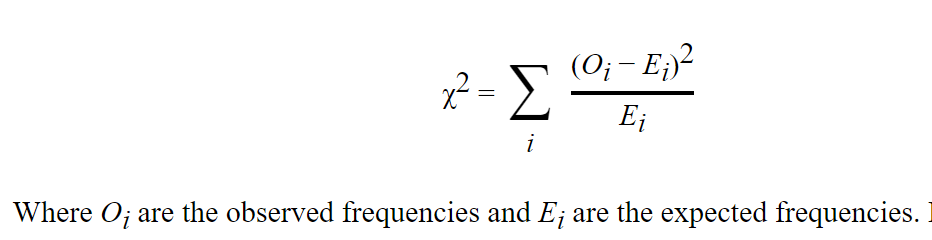

In [99]:
total_rolls = sum(freq)

expected  = np.ones(6) * total_rolls / 6
test_statistic = sum( (freq - expected)**2 / expected )

print(f'test statistic - chi-sqaure = {test_statistic}')

# simulaion of rolling
iters = 1000
counter = 0
for _ in range(iters):
    sample = np.random.choice([1,2,3,4,5,6], total_rolls, replace=True)
    vals, counts = np.unique(sample, return_counts=True)
        
    sample_stat = sum( (counts - expected)**2 / expected ) 
    
    if sample_stat >= test_statistic:
        counter += 1
    
# calculation of p-value
p_value = counter / iters

print(f"p value is {round(p_value,3)}")

NameError: name 'freq' is not defined

the p-value depends on the choice of test statistic and the model of the null hypothesis, and sometimes these choices determine whether an effect is statistically significant or not.

### First babies again

In [ ]:
firsts = preg[(preg.outcome==1) & (preg.birthord == 1) & (preg.prglngth.isna() == False)]
others = preg[(preg.outcome==1) & (preg.birthord != 1) & (preg.prglngth.isna() == False)]

In [ ]:
pool = np.hstack((firsts.prglngth, others.prglngth))

In [ ]:
def ChiSquared(data, pool):
    vals, counts = np.unique(data, return_counts=True) 
       
    index = np.where((vals >=35 ) & (vals<=43))
    observed = counts[index]
    
# calculate expected vals
# The null hypothesis is that both samples are drawn from the same distribution (pool)
    vals_model, counts_model = np.unique(pool, return_counts=True) 
    pmf_model = counts_model / sum(counts_model) 
    
    index_model =  np.where((vals_model >=35 ) & (vals_model<=43))
    expected = pmf_model[index_model]* len(data)
    
# calculate test statistic
    test_statistic = sum((observed - expected)**2 / expected)
    
    return round(test_statistic,2)

In [ ]:
chi_stat = ChiSquared(firsts.prglngth.values, pool)+ChiSquared(others.prglngth.values, pool)
chi_stat

In [ ]:
def null_hypothesis_simulation(pool, len1, len2, chi_stat, n=1000):
    stats = []
    for _ in range(n):
        sample_1 = np.random.choice(pool, size=len1, replace=True)
        sample_2 = np.random.choice(pool, size=len2, replace=True)
        
        test_stat = ChiSquared(sample_1, pool)+ChiSquared(sample_2, pool)
        stats.append(test_stat)
    
    xs = np.linspace(35,43,100)
    cdf = ECDF(stats)
    sns.lineplot(x=xs, y=cdf(xs))
    
    plt.axvline(chi_stat,0,1,color='gray')

In [ ]:
null_hypothesis_simulation(pool, len(firsts.prglngth), len(others.prglngth),chi_stat)

We conclude that the observed chi-squared statistic is unlikely under the null hypothesis, so the apparent effect is statistically significant.

# Errors

## false positive rate
**Test**: effect real    
 **Reality**: effect is not real

The probability, that we will wrongly consider effect as significant while it is actually due to chance.

The false positive rate is relatively easy to compute: if the threshold is 5%, the false positive rate is 5%

## false negative rate
**Test**: effect is not real    
 **Reality**: effect is real

probability that the hypothesis test will fail, but effect is real

In [ ]:
def FalseNegRate(data, n=1000):
    group1, group2 = data
    
    count = 0
    
    for i in range(n):
        sample1 = np.random.choice(group1, len(group1),replace=True)
        sample2 = np.random.choice(group2, len(group2),replace=True)
        
        p_value = HypTest(sample1, sample2)
        
        if p_value > 0.05:
            count += 1
            
    return count/n

In [ ]:
def HypTest(data1, data2):
    test_stat = CalcTestStat(data1,data2)
    
    pool = np.hstack((data1, data2))
        
    iters = 100
    counter = 0
    for _ in range(iters):
        np.random.shuffle(pool)
        
        sample1 = pool[:len(data1)]
        sample2 = pool[len(data1):]
#         sample1 = np.random.choice(pool, size=len(data1),replace=True)
#         sample2 = np.random.choice(pool, size=len(data2),replace=True)
        
        stat = CalcTestStat(sample1, sample2)
        
        if stat >= test_stat:
            counter += 1
            
    p_value = counter / iters
    
    return p_value  

In [ ]:
def CalcTestStat(data1, data2):
    test_stat = abs(np.mean(data1) - np.mean(data2))
    
    return test_stat

In [ ]:
data = firsts.prglngth.values, others.prglngth.values
FalseNegRate(data)

The result is about 70%, which means that if the actual difference in mean pregnancy length is 0.078 weeks, we expect an experiment with this sample size to yield a negative test 70% of the time.

This result is often presented the other way around: if the actual difference is 0.078 weeks, we should expect a positive test only 30% of the time. 

## Power of a hypothesis test 
is the probability that the test correctly rejects the null hypothesis

In previous example power = 30 %

## Exercises to chapter 9

### Exercise 1

In [ ]:
powers = []
ps = []

n_arr = [100,500,1000,2000,4000,5000,7000,10000,15000]

for n in n_arr:
    first = np.random.choice(firsts.prglngth.values, size=n, replace=True)
    other = np.random.choice(others.prglngth.values, size=n, replace=True)

    data = first, other
    neg_rate = FalseNegRate(data)
    
    powers.append(1-neg_rate)

    p_vals = HypTest(first, other)
    ps.append(p_vals)

fig, ax = plt.subplots(figsize=[12,6], nrows=1, ncols=2)
sns.scatterplot(x=n_arr, y=powers,ax=ax[0]).set(title='Power vs size of sample')
sns.scatterplot(x=n_arr, y=ps,ax=ax[1]).set(title='P value vs size of sample')

### Exercise 2

In [ ]:
def CalcTestStat(data1, data2):
    test_stat = abs(np.mean(data1) - np.mean(data2))
    
    return test_stat

#### permutation

In [ ]:
def HypTest(data1, data2):
    test_stat = CalcTestStat(data1,data2)
    
    pool = np.hstack((data1, data2))
    
    iters = 100
    counter = 0
    max_stat = 0
    
    for i in range(iters):
        np.random.shuffle(pool)
        sample1 = pool[:len(data1)]
        sample2 = pool[len(data1):]
        
        stat = CalcTestStat(sample1, sample2)
        
        if stat >= test_stat:
            counter += 1
            
        if stat > max_stat:
            max_stat = stat
    
    p_value = counter / iters
    
    print(f"p value is {round(p_value,2)}, max statistic is {round(max_stat,3)}, test stat is {round(test_stat,3)}") 

In [ ]:
HypTest(firsts[firsts.prglngth.isna()==False].prglngth.values, others[others.prglngth.isna()==False].prglngth.values)

In [ ]:
HypTest(firsts[firsts.totalwgt_lb.isna()==False].totalwgt_lb.values, others[others.totalwgt_lb.isna()==False].totalwgt_lb.values)

#### bootstrapping

In [ ]:
def HypTest_2(data1, data2):
    test_stat = CalcTestStat(data1,data2)
    
    pool = np.hstack((data1, data2))
    
    counter = 0
    iters = 100
    max_stat = 0
    for i in range(iters):
        sample1 = np.random.choice(pool, len(data1),replace=True)
        sample2 = np.random.choice(pool, len(data2),replace=True) 
        
        stat = CalcTestStat(sample1, sample2)
        
        if stat >= test_stat:
            counter += 1
            
        if stat > max_stat:
            max_stat = stat
    
    p_value = counter / iters
    
    print(f"p value is {round(p_value,2)}, max statistic is {round(max_stat,3)}, test stat is {round(test_stat,3)}")

In [ ]:
HypTest_2(firsts[firsts.prglngth.isna()==False].prglngth.values, others[others.prglngth.isna()==False].prglngth.values)

In [ ]:
HypTest_2(firsts[firsts.totalwgt_lb.isna()==False].totalwgt_lb.values, others[others.totalwgt_lb.isna()==False].totalwgt_lb.values)